<a href="https://colab.research.google.com/github/Gabrieleas10/TELCO-Customer-Churn/blob/main/churn.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
# importing libs 

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import sklearn
from sklearn.preprocessing import LabelEncoder , StandardScaler
from sklearn.decomposition import  PCA
from sklearn.model_selection import train_test_split , RandomizedSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import *
from sklearn.ensemble import RandomForestClassifier

In [ ]:
df = pd.read_csv('/content/WA_Fn-UseC_-Telco-Customer-Churn.csv')   

In [ ]:
print('Observations: ',df.shape[0])
print('Features: ',df.shape[1])

Observations:  7043
Features:  21


In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [ ]:
df.describe()

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


In [ ]:
df.isnull().sum()

customerID          0
gender              0
SeniorCitizen       0
Partner             0
Dependents          0
tenure              0
PhoneService        0
MultipleLines       0
InternetService     0
OnlineSecurity      0
OnlineBackup        0
DeviceProtection    0
TechSupport         0
StreamingTV         0
StreamingMovies     0
Contract            0
PaperlessBilling    0
PaymentMethod       0
MonthlyCharges      0
TotalCharges        0
Churn               0
dtype: int64

## Data Exploration

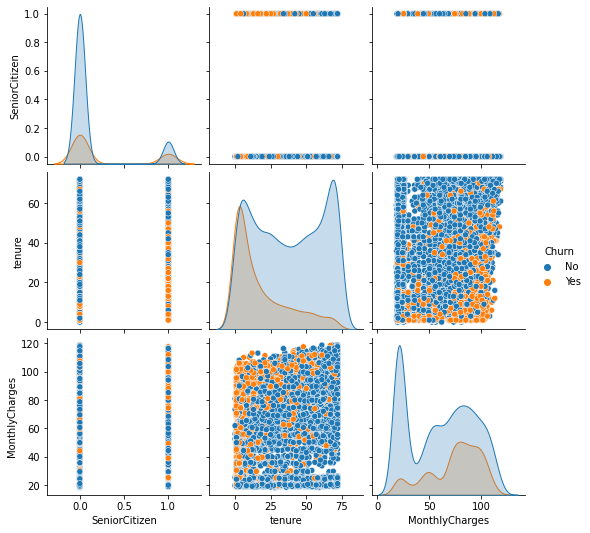

In [ ]:
sns.pairplot(df , hue = 'Churn')

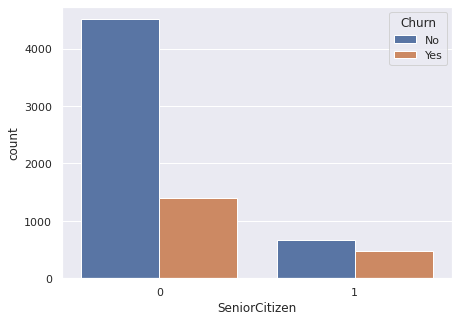

In [ ]:
# plot count of Senior Citizen in dataset
# more representative churn in senior citizen
sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.countplot(data = df , x = 'SeniorCitizen' , ax=ax , hue = 'Churn')

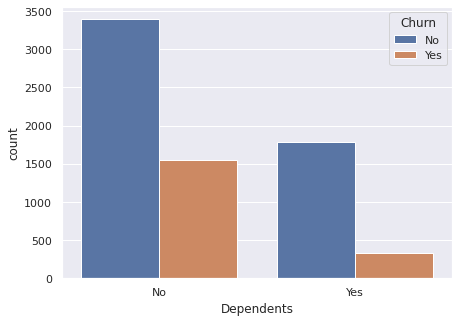

In [ ]:
# plot count of dependents in dataset

sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.countplot(data = df , x = 'Dependents' , ax=ax , hue = 'Churn')

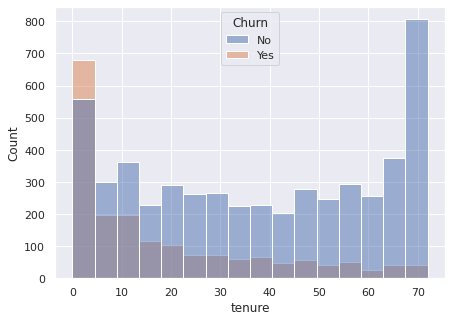

In [ ]:
# histplot of tenure in dataset
# there is a tendency to decrease churn with increased recurrence
sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.histplot(data = df , x = 'tenure' , ax=ax , hue = 'Churn')

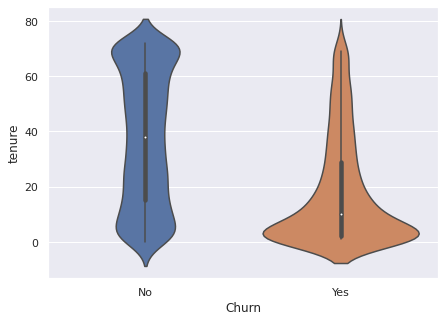

In [ ]:
# histplot of tenure in dataset
# there is a tendency to decrease churn with increased recurrence
sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.violinplot(data = df , y = 'tenure' , x = 'Churn',  ax=ax )

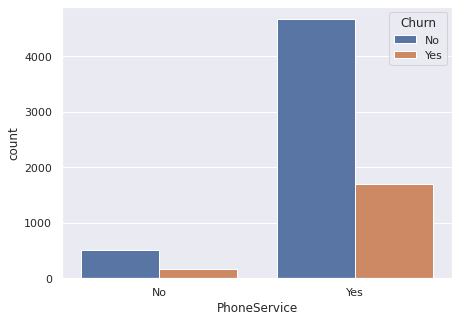

In [ ]:
# plot count of phone service in dataset

sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.countplot(data = df , x = 'PhoneService' , ax=ax , hue = 'Churn')

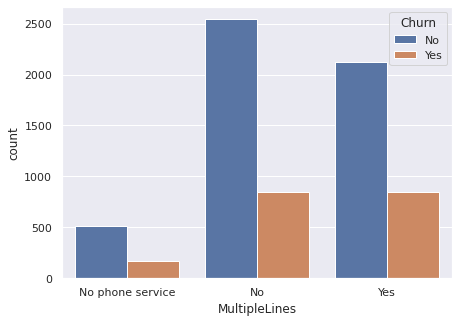

In [ ]:
# plot count of multiple lines service in dataset

sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.countplot(data = df , x = 'MultipleLines' , ax=ax , hue = 'Churn')

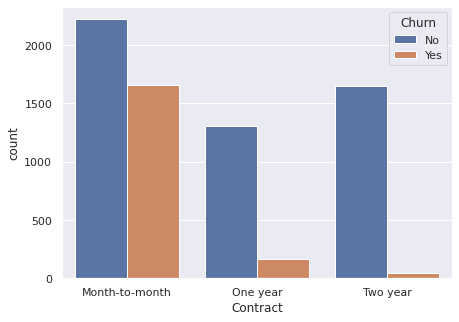

In [ ]:
# plot count of contract service in dataset
# the most representative churn in month-to-month class and the lower churn in two year contract
sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.countplot(data = df , x = 'Contract' , ax=ax , hue = 'Churn')

(array([0, 1, 2, 3]), <a list of 4 Text major ticklabel objects>)

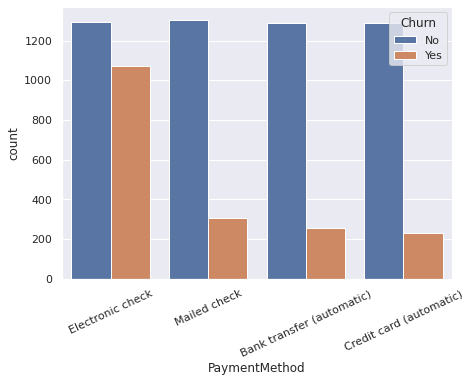

In [ ]:
# plot count of payment method in dataset
# eletronic check is the class with the most churn
sns.set_theme()
fig, ax = plt.subplots(figsize= (7,5))
sns.countplot(data = df , x = 'PaymentMethod' , ax=ax , hue = 'Churn')
plt.xticks(rotation=25)

## Feature Engineering

In [ ]:
# label encoding the features

le = LabelEncoder()

for col in list(df.columns):
    le.fit(df[col])
    df[col] = le.transform(df[col]) 

In [ ]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,5375,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505,0
1,3962,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466,0
2,2564,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157,1
3,5535,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400,0
4,6511,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925,1


In [ ]:
df.describe()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,3521.000000,0.504756,0.162147,0.483033,0.299588,32.371149,0.903166,0.940508,0.872923,0.790004,0.906432,0.904444,0.797104,0.985376,0.992475,0.690473,0.592219,1.574329,683.524776,3257.794122,0.265370
std,2033.283305,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.948554,0.737796,0.859848,0.880162,0.879949,0.861551,0.885002,0.885091,0.833755,0.491457,1.068104,478.511521,1888.693496,0.441561
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1760.500000,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,199.000000,1609.000000,0.000000
50%,3521.000000,1.000000,0.000000,0.000000,0.000000,29.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,2.000000,722.000000,3249.000000,0.000000
75%,5281.500000,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,2.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,1.000000,2.000000,1090.000000,4901.500000,1.000000
max,7042.000000,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,2.000000,1.000000,3.000000,1584.000000,6530.000000,1.000000


## Principal Component Analysis (PCA)

In [ ]:
# features to apply PCA

X = df.drop(['customerID','Churn'] , axis =1)
X.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,1,0,1,0,1,0,0,2,0,0,0,0,0,1,2,142,2505
1,1,0,0,0,34,1,0,0,2,0,2,0,0,0,1,0,3,498,1466
2,1,0,0,0,2,1,0,0,2,2,0,0,0,0,0,1,3,436,157
3,1,0,0,0,45,0,1,0,2,0,2,2,0,0,1,0,0,266,1400
4,0,0,0,0,2,1,0,1,0,0,0,0,0,0,0,1,2,729,925


In [ ]:
# pca

pca = PCA(n_components=2)

pca.fit(X)

components = np.round(pca.explained_variance_ratio_ , 2)

components

array([0.94, 0.05])

## Feature Selection

In [ ]:
# applying the 2 components in dataset

pca_1 = pca.transform(X)[:,0]
pca_2 = pca.transform(X)[:,1]

df['PCA1'] = pca_1
df['PCA2'] = pca_2

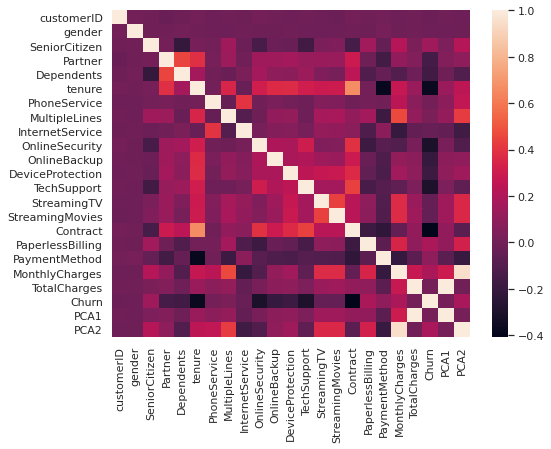

In [ ]:
# correlation matrix

fig, ax = plt.subplots(figsize= (8,6))
cm = df.corr(method='spearman')
sns.heatmap(cm , ax= ax)
plt.show()

In [ ]:
# spearman correlation factor

cm['Churn'].sort_values(ascending = False)

Churn               1.000000
PaperlessBilling    0.191825
MonthlyCharges      0.184743
PCA2                0.181438
SeniorCitizen       0.150889
PaymentMethod       0.102270
MultipleLines       0.037816
PCA1                0.018498
TotalCharges        0.014907
PhoneService        0.011942
gender             -0.008612
customerID         -0.017447
InternetService    -0.028690
StreamingTV        -0.037854
StreamingMovies    -0.039147
Partner            -0.150448
Dependents         -0.164221
DeviceProtection   -0.185998
OnlineBackup       -0.203189
TechSupport        -0.296815
OnlineSecurity     -0.303918
tenure             -0.367062
Contract           -0.406262
Name: Churn, dtype: float64

## Features Scale and Split

In [ ]:
# feature selection

features = df[['Contract','tenure','OnlineSecurity','TechSupport','Dependents',
               'PaperlessBilling','MonthlyCharges','DeviceProtection','SeniorCitizen']]

label = df['Churn']

In [ ]:
# scalling  and train/test split

scaler = sklearn.preprocessing.StandardScaler()

features = scaler.fit_transform(features)

train_features, test_features, train_labels, test_labels = train_test_split(features , label, 
                                                                            test_size = 0.25, 
                                                                            random_state = 0)

## Model and Hyperparams Selection

### **Logistic Regression**

In [ ]:
# build the params grid of logistic regression

params_grid = {'penalty':['l1', 'l2', 'elasticnet'],
               'solver':['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
               'max_iter':[25,50,100,200,500]}

In [ ]:
# build classifier
clf = LogisticRegression()

In [ ]:
# run randomized search

n_search = 100
random_search = RandomizedSearchCV(clf, param_distributions = params_grid,
                                   n_iter = n_search)

In [ ]:
# search for best hyperparams

random_search.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 75 is smaller than n_iter=100. Running 75 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver newton-cg supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedW

RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=LogisticRegression(C=1.0, class_weight=None,
                                                dual=False, fit_intercept=True,
                                                intercept_scaling=1,
                                                l1_ratio=None, max_iter=100,
                                                multi_class='auto', n_jobs=None,
                                                penalty='l2', random_state=None,
                                                solver='lbfgs', tol=0.0001,
                                                verbose=0, warm_start=False),
                   iid='deprecated', n_iter=100, n_jobs=None,
                   param_distributions={'max_iter': [25, 50, 100, 200, 500],
                                        'penalty': ['l1', 'l2', 'elasticnet'],
                                        'solver': ['newton-cg', 'lbfgs',
                                                

In [ ]:
random_search.best_params_

{'max_iter': 25, 'penalty': 'l1', 'solver': 'saga'}

In [ ]:
clf = LogisticRegression(max_iter = random_search.best_params_['max_iter'],
                         penalty = random_search.best_params_['penalty'],
                         solver = random_search.best_params_['solver'])

clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

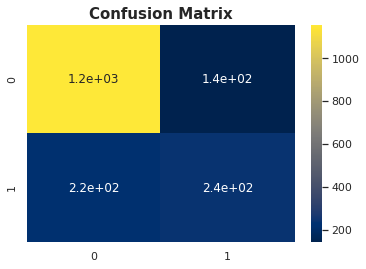

In [ ]:
# confusion matrix

cfm = confusion_matrix(test_labels , predictions)
sns.heatmap(cfm, annot=True , cmap ='cividis')
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()

In [ ]:
# evaluate the classifier model

acc = accuracy_score(test_labels , predictions)
f1 = f1_score(test_labels , predictions)
rcall = recall_score(test_labels , predictions)
print('Logistic Regression Accuracy: ', str(round(acc,3)*100) , ' %')
print('Logistic Regression F1 Score: ', str(round(f1,3)))
print('Logistic Regression Recall: ', str(round(rcall,3)))

Logistic Regression Accuracy:  79.4  %
Logistic Regression F1 Score:  57.4  %
Logistic Regression Recall:  57.4  %


### **Random Forest Classifier**

In [ ]:
# build the params grid of random forest classifier

params_grid = {'n_estimators':[25,50,75,150,200,250,300],
               'criterion':['gini', 'entropy'],
               'max_depth':[5,10,50,100,150,200]}

In [ ]:
# build classifier
clf = RandomForestClassifier()

In [ ]:
# run randomized search

n_search = 100
random_search = RandomizedSearchCV(clf, param_distributions = params_grid,
                                   n_iter = n_search)

In [ ]:
# search for best hyperparams

random_search.fit(train_features, train_labels)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 84 is smaller than n_iter=100. Running 84 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


RandomizedSearchCV(cv=None, error_score=nan,
                   estimator=RandomForestClassifier(bootstrap=True,
                                                    ccp_alpha=0.0,
                                                    class_weight=None,
                                                    criterion='gini',
                                                    max_depth=None,
                                                    max_features='auto',
                                                    max_leaf_nodes=None,
                                                    max_samples=None,
                                                    min_impurity_decrease=0.0,
                                                    min_impurity_split=None,
                                                    min_samples_leaf=1,
                                                    min_samples_split=2,
                                                    min_weight_fraction_leaf=0.0,
            

In [ ]:
random_search.best_params_

{'criterion': 'gini', 'max_depth': 5, 'n_estimators': 200}

In [ ]:
clf = RandomForestClassifier(n_estimators = random_search.best_params_['n_estimators'],
                         criterion = random_search.best_params_['criterion'],
                         max_depth = random_search.best_params_['max_depth'])

clf.fit(train_features, train_labels)
predictions = clf.predict(test_features)

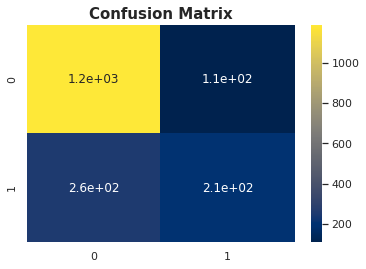

In [ ]:
# confusion matrix

cfm = confusion_matrix(test_labels , predictions)
sns.heatmap(cfm, annot=True , cmap ='cividis')
plt.title('Confusion Matrix' , size = 15 , weight = 'bold')
plt.show()

In [ ]:
# evaluate the classifier model

acc = accuracy_score(test_labels , predictions)
f1 = f1_score(test_labels , predictions)
rcall = recall_score(test_labels , predictions)
print('Logistic Regression Accuracy: ', str(round(acc,3)*100) , ' %')
print('Logistic Regression F1 Score: ', str(round(f1,3)*100) , ' %')
print('Logistic Regression Recall: ', str(round(f1,3)*100) , ' %')

Logistic Regression Accuracy:  79.2  %
Logistic Regression F1 Score:  53.1  %
Logistic Regression Recall:  53.1  %
